In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('..')
from points2mask import generate_gt_mask

# Control points to mask
This notebook demonstrate the generation of a boolean map from the coordinates of the control points stored in a txt file. For this example, we'll be using a data sample from the public CAMUS dataset.

In [2]:
img_path = 'img_demo.png'
annotations_path = 'annotations.txt'

Let us plot the control points on the image. They delineate the cavity of the Left Ventricle:

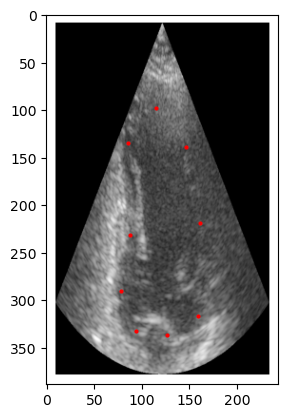

In [3]:
# Read the image to retrieve image dimensions
img = cv2.imread(img_path)
height, width, _ = img.shape

# Read the control points
ctrl_points = np.loadtxt(annotations_path).T

# Plot the control points on the original image
plt.imshow(img)
plt.plot(ctrl_points[0], ctrl_points[1], 'ro', ms=2)
plt.show()


Now, let us generate the mask and superimpose it on the image.

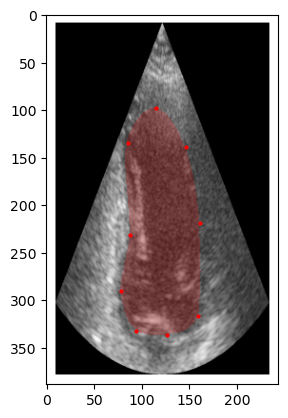

In [4]:
# Generate the mask
mask = generate_gt_mask('annotations.txt', width, height)

# Plot the generated mask on the original image, together with the control points
plt.imshow(img)
plt.imshow(np.ma.masked_where(mask == 1, mask), cmap='prism', alpha=0.2)
plt.plot(ctrl_points[0], ctrl_points[1], 'ro', ms=2)
plt.show()